## **IMPORTS**

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
brazil = pd.read_csv(
    filepath_or_buffer="../data/timeSeriesBrazil_process.csv",
    dtype={
        "year":"int",
        "state":"category",
        "month":"category",
        "number":"float",
        "date":"string"
    }
)
brazil.drop(columns=['Unnamed: 0'], inplace=True)
brazil['date'] = pd.to_datetime(arg=brazil['date'], format="%m/%d/%Y")

In [65]:
plt.style.use('Solarize_Light2')

----------------------------------------

## **ANÁLISE HISTÓRICA DOS INCÊNDIOS NO BRAZIL**

<Axes: title={'center': 'Number of Fires Over Time'}, xlabel='Years', ylabel='Fires Number'>

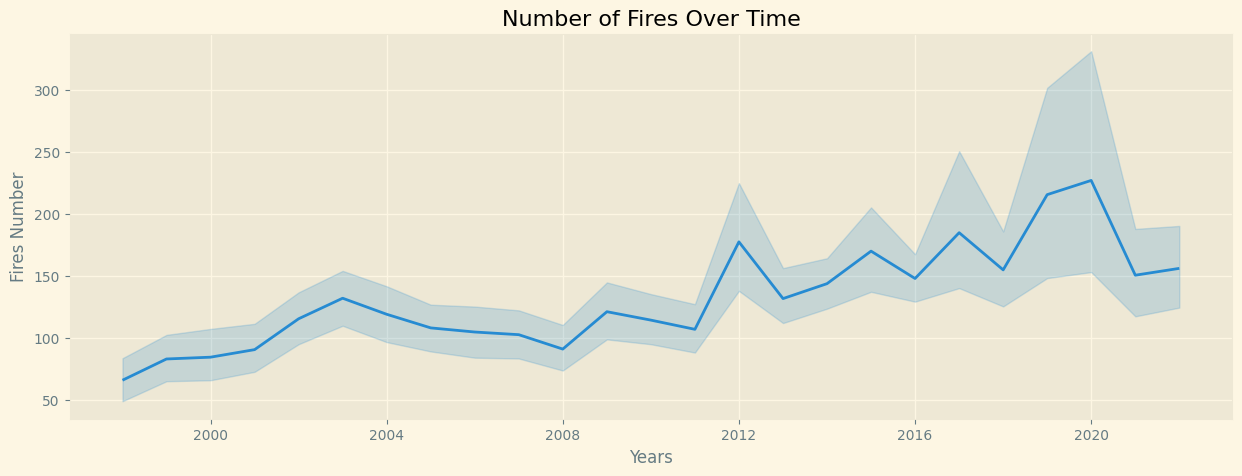

In [41]:
plt.figure(figsize=(15,5))
plt.title("Number of Fires Over Time")
plt.xlabel(xlabel="Years")
plt.ylabel(ylabel="Fires Number")
sns.lineplot(x=brazil['date'], y=brazil['number'])

<Axes: title={'center': 'Number of Fires Over Time'}, xlabel='Years', ylabel='Fires Number'>

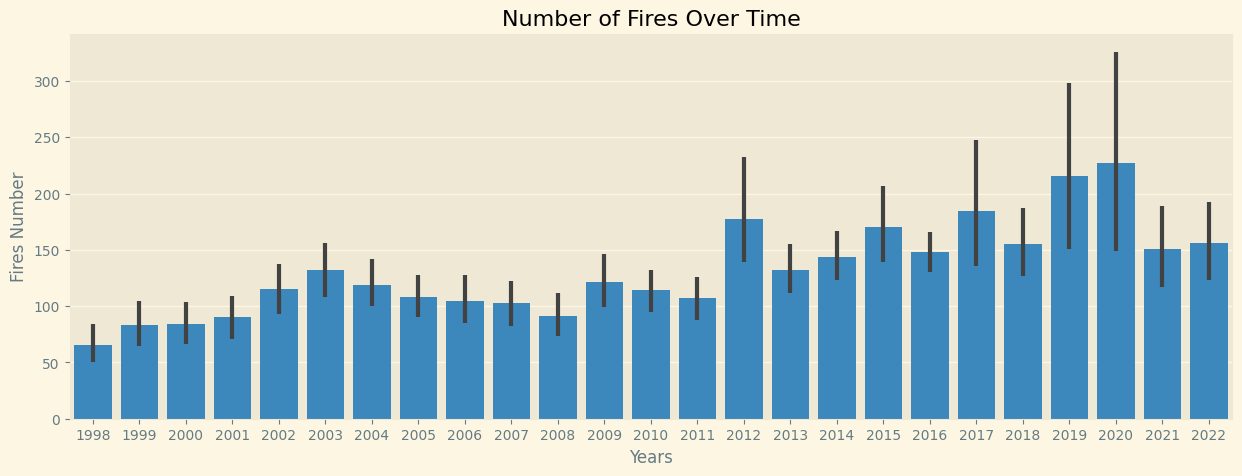

In [42]:
plt.figure(figsize=(15,5))
plt.title("Number of Fires Over Time")
plt.xlabel(xlabel="Years")
plt.ylabel(ylabel="Fires Number")
sns.barplot(x=brazil['date'].dt.year, y=brazil['number'])

In [88]:
data = {}
for i in brazil.state.value_counts().index:
    data[i] = 0

for index, row in brazil.iterrows():
    data[row['state']] = data[row['state']] + row['number']

([<matplotlib.patches.Wedge at 0x13f574fded0>,
 [Text(1.0917135246619543, 0.13476490667147975, 'Rio de Janeiro'),
  Text(0.8347385426925993, 0.7163878595728963, 'Mato Grosso'),
  Text(0.2807008693398559, 1.063582165115535, 'Paraíba'),
  Text(-0.0054353739332381554, 1.099986571149942, 'Maranhão'),
  Text(-0.31469054080022146, 1.0540255516498944, 'Minas Gerais'),
  Text(-0.6290473217380355, 0.9023854315170456, 'Piaui'),
  Text(-0.864235949682388, 0.6805117363253782, 'Amazonas'),
  Text(-1.0421557244717967, 0.3520105764755721, 'Bahia'),
  Text(-1.0999432088675, -0.011177533997590342, 'Ceará'),
  Text(-1.0390676448636142, -0.36102413963277047, 'São Paulo'),
  Text(-0.8541890823848012, -0.693080811691257, 'Goias'),
  Text(-0.5896827100060484, -0.9285872611230045, 'Pará'),
  Text(-0.261352989081268, -1.0685011067370436, 'Tocantins'),
  Text(0.026149977681622062, -1.099689128193623, 'Rondônia'),
  Text(0.25192129374839023, -1.0707640551289241, 'Santa Catarina'),
  Text(0.46034863934684594, -0

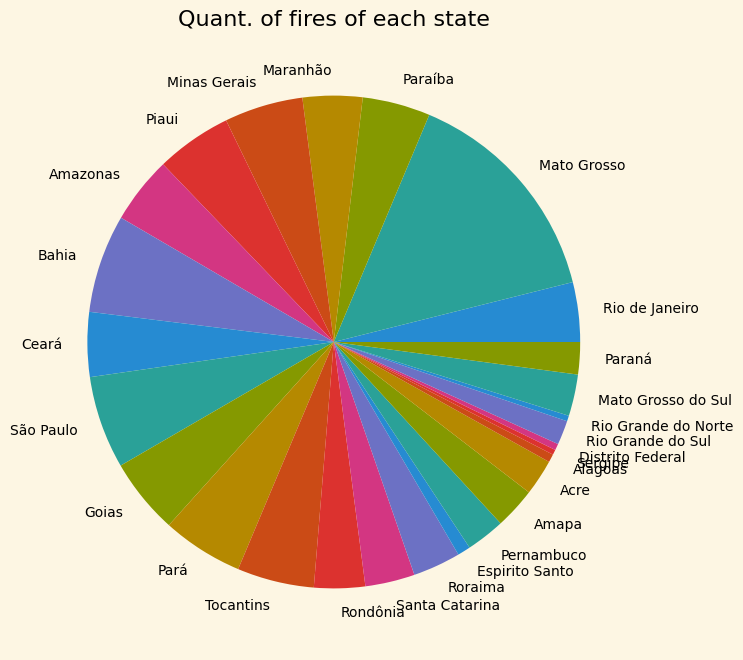

In [89]:
plt.figure(figsize=(8,8))
plt.title("Quant. of fires of each state")
plt.pie(
    x=data.values(),
    labels=data.keys()
)

#### CONCLUSÃO
Percebe-se um aumento no número de incêndios com o passar do tempo, e ainda, com alguns picos em anos específicos, mostrando que essa tendência pode continuar aumentando. Vamos analisar especificamente alguns anos que tiveram um pico no número de incêndios.

----------------------------------------

## **ANÁLISE DO ANO 2012**

In [86]:
data2012 = {}
for i in brazil[(brazil['date'] == "2012")].state.value_counts().index:
    data2012[i] = 0

for index, row in brazil[(brazil['date'] == "2012")].iterrows():
    data2012[row['state']] = data2012[row['state']] + row['number']

([<matplotlib.patches.Wedge at 0x13f591cbee0>,
 [Text(1.0966263820066782, 0.08608471575688334, 'Rio de Janeiro'),
  Text(0.7943964745832292, 0.7608772839096571, 'Mato Grosso'),
  Text(0.13186200207456295, 1.0920679522854282, 'Paraíba'),
  Text(-0.08980722039553354, 1.0963278082602979, 'Tocantins'),
  Text(-0.3652593011390196, 1.0375864508229833, 'Piaui'),
  Text(-0.6295088153322865, 0.902063551762813, 'São Paulo'),
  Text(-0.7993992518134703, 0.7556195049097555, 'Amazonas'),
  Text(-0.9978871269266981, 0.46284044973833055, 'Bahia'),
  Text(-1.0991895716354527, 0.042217124580790445, 'Ceará'),
  Text(-1.0817891491711777, -0.19932946780518765, 'Santa Catarina'),
  Text(-1.0409340042313693, -0.35560708490530385, 'Roraima'),
  Text(-0.9303716482298298, -0.5868633539164888, 'Goias'),
  Text(-0.7358523666393231, -0.817631515116258, 'Maranhão'),
  Text(-0.4815823900640012, -0.9889784636584582, 'Minas Gerais'),
  Text(0.11361313200577894, -1.0941170212714166, 'Pará'),
  Text(0.551335333245785, 

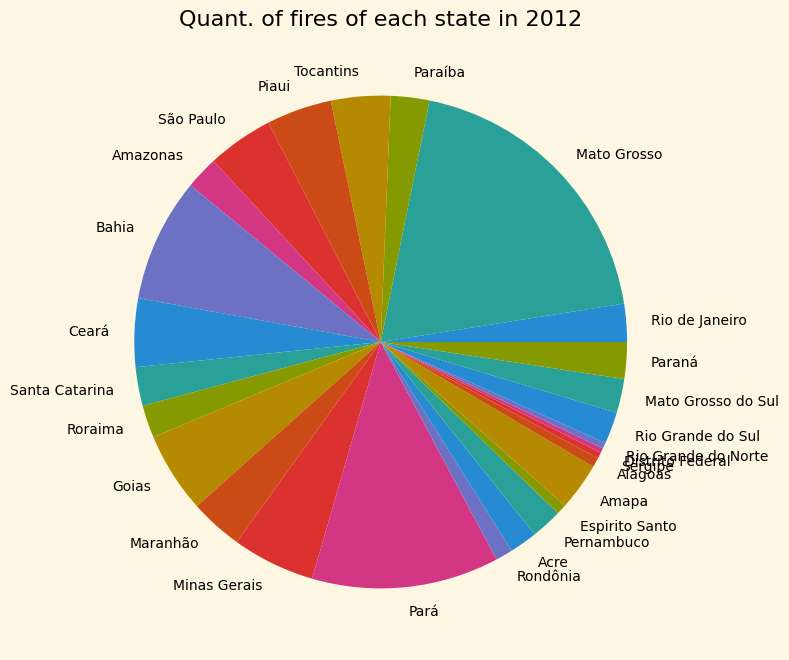

In [87]:
plt.figure(figsize=(8,8))
plt.title("Quant. of fires of each state in 2012")
plt.pie(
    x=data2012.values(),
    labels=data2012.keys()
)

<Axes: title={'center': 'Number of fire over the months in MT 2012'}, xlabel='month', ylabel='number'>

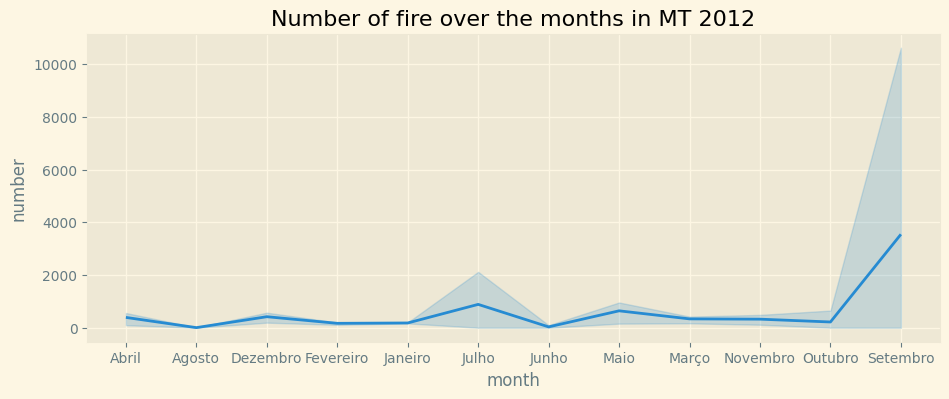

In [95]:
plt.figure(figsize=(11,4))
plt.title("Number of fire over the months in MT 2012")
sns.lineplot(
    x=brazil[(brazil['date'] == "2012") & (brazil['state'] == "Mato Grosso")]['month'],
    y=brazil[(brazil['date'] == "2012") & (brazil['state'] == "Mato Grosso")]['number']
)


#### CONCLUSÃO (http://objdig.ufrj.br/16/teses/780807.pdf)

Ao analisar o gráfico, percebe-se que no Mato Grosso aconteceu muitos incêndios florestais, principalemente em Julho e Setembro. Dado essa informação, o grupo achou uma pesquisa de mestrado desenvolvida em 2012, com o tema: "ANÁLISE GEOECOLÓGICA DOS INCÊNDIOS FLORESTAIS NO PARQUE NACIONAL DO ITATIAIA".

Esta pesquisa valida essas informações encotradas, onde na página 67, é apresentado dados temporais dos incêndios no parque Itatiaia, mostrando a quantidade de incêndios, áreas devastadas e como alguns fatores externos influenciaram a controlar melhor esses desastres.

O parque Itatiaia fica em Goiânia, região Centro-Oeste, mesma região de MT (Mato Grosso), concluindo que essa é um região de interesse para acontecimentos de incêndios florestais.

Ainda Mato Grosso também se mostra como estado com maior número de incêndios dentre toda a base de dados.

----------------------------------------

## **ANÁLISE DO ANO 2020**

In [90]:
data2020 = {}
for i in brazil[(brazil['date'] == "2020")].state.value_counts().index:
    data2020[i] = 0

for index, row in brazil[(brazil['date'] == "2020")].iterrows():
    data2020[row['state']] = data2020[row['state']] + row['number']

([<matplotlib.patches.Wedge at 0x13f574aa110>,
 [Text(1.0996209632352938, 0.02887450802152463, 'Acre'),
  Text(1.0954108780332845, 0.10037434077665976, 'Paraíba'),
  Text(1.0662913182809683, 0.27022735716177, 'São Paulo'),
  Text(1.0257807765981535, 0.3972075003844837, 'Sergipe'),
  Text(0.9775572405812223, 0.5043628072996924, 'Santa Catarina'),
  Text(0.8674061973337198, 0.6764661771493503, 'Roraima'),
  Text(0.7609607037159398, 0.7943165662380093, 'Rondônia'),
  Text(0.6850651563884117, 0.8606310077510113, 'Rio de Janeiro'),
  Text(0.5733803420534892, 0.9387411695172552, 'Rio Grande do Sul'),
  Text(0.45413500687010433, 1.001878932573737, 'Rio Grande do Norte'),
  Text(0.28724210266884814, 1.0618342499912024, 'Piaui'),
  Text(0.09637260080533368, 1.0957701957135064, 'Pernambuco'),
  Text(-0.13764014348776332, 1.0913547502534033, 'Pará'),
  Text(-0.47401127980098373, 0.9926294911100685, 'Paraná'),
  Text(-0.6234832016806884, 0.9062387639148957, 'Alagoas'),
  Text(-0.6940633833963431, 

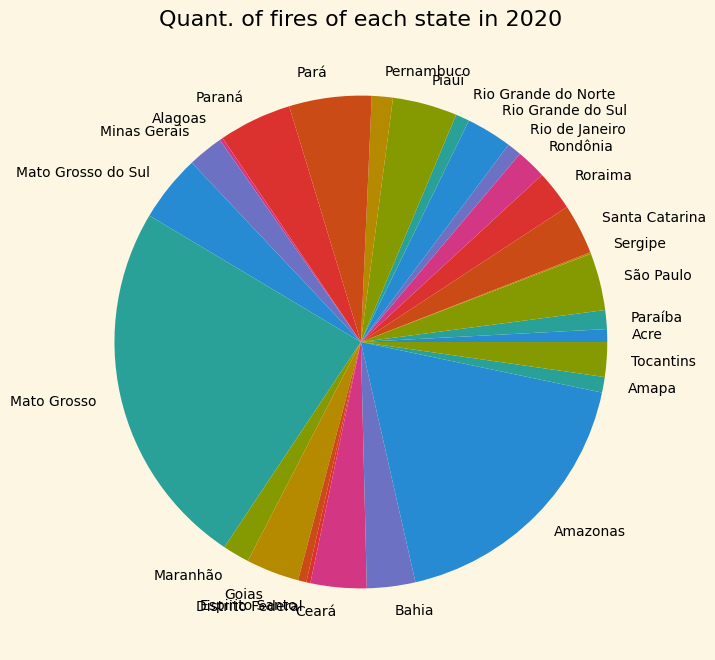

In [96]:
plt.figure(figsize=(8,8))
plt.title("Quant. of fires of each state in 2020")
plt.pie(
    x=data2020.values(),
    labels=data2020.keys()
)

<Axes: title={'center': 'Number of fire over the months in MT 2020'}, xlabel='month', ylabel='number'>

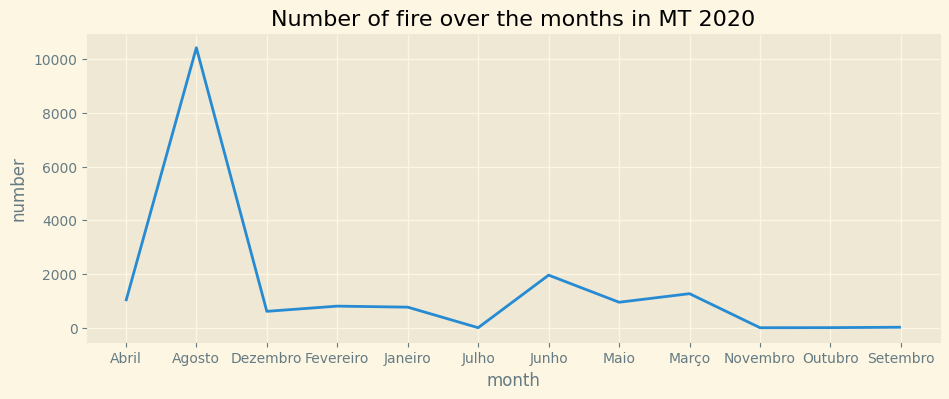

In [93]:
plt.figure(figsize=(11,4))
plt.title("Number of fire over the months in MT 2020")
sns.lineplot(
    x=brazil[(brazil['date'] == "2020") & (brazil['state'] == "Mato Grosso")]['month'],
    y=brazil[(brazil['date'] == "2020") & (brazil['state'] == "Mato Grosso")]['number']
)

<Axes: title={'center': 'Number of fire over the months in AM 2020'}, xlabel='month', ylabel='number'>

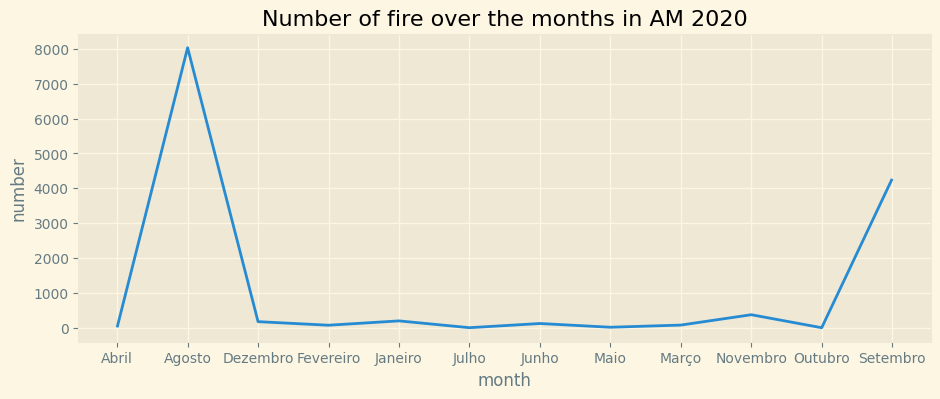

In [94]:
plt.figure(figsize=(11,4))
plt.title("Number of fire over the months in AM 2020")
sns.lineplot(
    x=brazil[(brazil['date'] == "2020") & (brazil['state'] == "Amazonas")]['month'],
    y=brazil[(brazil['date'] == "2020") & (brazil['state'] == "Amazonas")]['number']
)

#### Conclusão

https://www.icv.org.br/website/wp-content/uploads/2021/01/balancodosincendiosemmatogrossoem2020.pdf

"Apesar de sua área representar pouco mais de 10% do território brasileiro, Mato Grosso concentrou mais de 22% das áreas queimadas no Brasil entre 2000 a 2019", como mostra uma pesquisa desenvolvida no ano de 2020. Essa informação também valida o gráfico que mostra que a região de MT é uma região que necessita de mais cuidados e investimentos para evitar e controlar os incêndios florestais, principalmente nos meses de Junho, Julho, Agosto e Setempo (picos).

https://g1.globo.com/am/amazonas/noticia/2020/10/11/queimadas-no-amazonas-em-2020-superam-recorde-de-2005-e-registram-maior-numero-da-historia.ghtml

"Queimadas no Amazonas em 2020 registram maior número da história", como mostra notícia no G1. "Meses de agosto e setembro costumam ser os mais secos do ano na Região Amazônica.", validando o gráfico que apresenta um número maior de incêndios nos meses de Agosto e Setembro na Região Amazônica. Ainda, "Os municípios de Apuí e Lábrea, no extremo sul do Estado e fronteira com o Mato Grosso, são os mais afetados pelas queimadas nesse ano", diz pesquisa do G1, mostrando a relação dos estados aqui analisados no ano de 2020.

